## Import Packages

In [36]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from matplotlib import cm
import pandas as pd
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
import scipy.stats as stats
import os
import ttest
import Smooth_Data
#import seaborn as sns
#sns.set_context("talk")
import Area_Avg
import cyclic_lon
from netCDF4 import Dataset
from netCDF4 import MFDataset
from ncdump_python3 import ncdump
from mpl_toolkits.basemap import Basemap
%matplotlib inline
mpl.rc('font',size=27) #set default font size and weight for plots

In [2]:
Months = ['01','02','03','04','05','06','07','08','09','10','11','12']
Sims = ['Sim1','Sim2','Sim3']

In [3]:
Years = range(2005,2066)
Years = list(map(str, Years))

Years_fixODS = range(2001,2066)
Years_fixODS = list(map(str, Years_fixODS))

Years_wAVD = range(2005,2066)
Years_wAVD = list(map(str, Years_wAVD))

In [4]:
#establish initial root directory and modify it to be a list of strings,
    #not integers

rootdir = 'Data/'

dirnames = os.listdir(rootdir)
dirnames = list(map(str, dirnames))
dirnames

['.DS_Store',
 'Port',
 'b.e10.BRCP45WCN.f19_g16.waLMP.001',
 'b.e10.BRCP45WCN.f19_g16.waLMP.002',
 'b.e10.BRCP45WCN.f19_g16.waLMP.003',
 'b40.1955-2005.2deg.wcm.002',
 'b40.rcp4_5.2deg.wcm.001',
 'b40.rcp4_5.2deg.wcm.002',
 'b40.rcp4_5.2deg.wcm.003',
 'b40.rcp4_5.2deg.wcm.fixODS2000.001',
 'b40.rcp4_5.2deg.wcm.fixODS2000.002',
 'b40.rcp4_5.2deg.wcm.fixODS2000.003']

In [5]:
#establish full directories for each run

#WACCM4 2Deg Warming RCP 45 Run1
datadir_RCP45_Sim1 = rootdir + dirnames[6] +'/atm'+'/interp/'
#WACCM4 2Deg Warming RCP 45 Run2
datadir_RCP45_Sim2 = rootdir + dirnames[7] +'/atm'+'/interp/'   
#WACCM4 2Deg Warming RCP 45 Run3
datadir_RCP45_Sim3 = rootdir + dirnames[8] +'/atm'+'/interp/'
#WACCM4 2Deg Warming fixODS RCP 45 Run1
datadir_fixODS_Sim1 = rootdir + dirnames[9] +'/atm'+'/interp/'    
#WACCM4 2Deg Warming fixODS RCP 45 Run2
datadir_fixODS_Sim2 = rootdir + dirnames[10] +'/atm'+'/interp/'
#WACCM4 2Deg Warming fixODS RCP 45 Run3
datadir_fixODS_Sim3 = rootdir + dirnames[11] +'/atm'+'/interp/'
#WACCM4 2Deg Warming waLMP RCP 45 Run1
datadir_waAVD_Sim1 = rootdir + dirnames[2] +'/atm'+'/interp/'
#WACCM4 2Deg Warming waLMP RCP 45 Run2
datadir_waAVD_Sim2 = rootdir + dirnames[3] +'/atm'+'/interp/'
#WACCM4 2Deg Warming waLMP RCP 45 Run3
datadir_waAVD_Sim3 = rootdir + dirnames[4] +'/atm'+'/interp/'

In [6]:
Datadir_RCP45 = [datadir_RCP45_Sim1,\
               datadir_RCP45_Sim2,\
               datadir_RCP45_Sim3]
Datadir_fixODS2000 = [datadir_fixODS_Sim1,\
               datadir_fixODS_Sim2,\
               datadir_fixODS_Sim3]
Datadir_wAVD = [datadir_waAVD_Sim1,\
               datadir_waAVD_Sim2,\
               datadir_waAVD_Sim3]

In [7]:
datadir_RCP45_Sim1

'Data/b40.rcp4_5.2deg.wcm.001/atm/interp/'

In [8]:
Sample_file = Datadir_wAVD[0] + 'O3.2061.11.Arctic.nc'
Sample_file = Dataset(Sample_file)
Lat = np.squeeze(Sample_file.variables['lat'])
Lon = np.squeeze(Sample_file.variables['lon'])
Pressure = np.squeeze(Sample_file.variables['lev_p'])
Pressure_L = np.log10(Pressure)
ncdump(Sample_file)
Sample_file.close()

NetCDF Global Attributes:
	history: 'Tue Feb 27 21:17:05 2018: ncks -O -d lat,60.,90. /glade/scratch/ksmith/b.e10.BRCP45WCN.f19_g16.waLMP.001/atm/interp/O3.2061.11.nc /glade/scratch/ksmith/b.e10.BRCP45WCN.f19_g16.waLMP.001/atm/interp/O3.2061.11.Arctic.nc'
	NCO: '4.6.9'
NetCDF dimension information:
	Name: time
		size: 1
		type: dtype('float64')
		bounds: 'time_bnds'
		calendar: 'noleap'
		units: 'days since 2005-01-01 00:00:00'
		long_name: 'time'
	Name: lev_p
		size: 23
		type: dtype('float32')
		long_name: 'pressure'
		units: 'hPa'
		positive: 'down'
	Name: lat
		size: 16
		type: dtype('float64')
		units: 'degrees_north'
		long_name: 'latitude'
	Name: lon
		size: 144
		type: dtype('float64')
		units: 'degrees_east'
		long_name: 'longitude'
NetCDF variable information:
	Name: O3
		dimensions: ('time', 'lev_p', 'lat', 'lon')
		size: 52992
		type: dtype('float32')
		_FillValue: 9.96921e+36


In [9]:
Pressure.shape

(23,)

In [10]:
Pressure_L

array([-1.        , -0.30103   ,  0.        ,  0.30103   ,  0.47712126,
        0.69897   ,  1.        ,  1.30103   ,  1.4771212 ,  1.69897   ,
        1.845098  ,  2.        ,  2.1760912 ,  2.30103   ,  2.39794   ,
        2.4771214 ,  2.60206   ,  2.69897   ,  2.7781513 ,  2.845098  ,
        2.929419  ,  2.9661417 ,  3.        ], dtype=float32)

In [11]:
#Read in all WACCM Temperature Data

RCP45 = dict()
for s in range(len(Sims)):
    RCP45[Sims[s]] = dict()
    for m in range(len(Months)):
        RCP45[Sims[s]][Months[m]] = dict()
        for y in range(len(Years)):
            try:
                files_RCP45 = Datadir_RCP45[s]+'O3.'+Years[y]+\
                '.'+Months[m]+'.Arctic.nc'
                RCP45_nc = Dataset(files_RCP45)
                RCP45[Sims[s]][Months[m]][Years[y]] = \
                np.squeeze(RCP45_nc.variables['O3'])
                RCP45_nc.close()
            except:
                pass

fixODS2000 = dict()
for s in range(len(Sims)):
    fixODS2000[Sims[s]] = dict()
    for m in range(len(Months)):
        fixODS2000[Sims[s]][Months[m]] = dict()
        for y in range(len(Years_fixODS)):
            try:
                files_fixODS2000 = Datadir_fixODS2000[s]+'O3.'+Years_fixODS[y]+\
                '.'+Months[m]+'.Arctic.nc'
                fixODS2000_nc = Dataset(files_fixODS2000)
                fixODS2000[Sims[s]][Months[m]][Years_fixODS[y]] = \
                np.squeeze(fixODS2000_nc.variables['O3'])
                fixODS2000_nc.close()
            except:
                pass
                
wAVD = dict()
for s in range(len(Sims)):
    wAVD[Sims[s]] = dict()
    for m in range(len(Months)):
        wAVD[Sims[s]][Months[m]] = dict()
        for y in range(len(Years_wAVD)):
            try:
                files_wAVD = Datadir_wAVD[s]+'O3.'+Years_wAVD[y]+\
                '.'+Months[m]+'.Arctic.nc'
                wAVD_nc = Dataset(files_wAVD)
                wAVD[Sims[s]][Months[m]][Years_wAVD[y]] = \
                np.squeeze(wAVD_nc.variables['O3'])
                wAVD_nc.close()
            except:
                pass

In [12]:
Pressure

array([1.00e-01, 5.00e-01, 1.00e+00, 2.00e+00, 3.00e+00, 5.00e+00,
       1.00e+01, 2.00e+01, 3.00e+01, 5.00e+01, 7.00e+01, 1.00e+02,
       1.50e+02, 2.00e+02, 2.50e+02, 3.00e+02, 4.00e+02, 5.00e+02,
       6.00e+02, 7.00e+02, 8.50e+02, 9.25e+02, 1.00e+03], dtype=float32)

In [40]:
Pressure_named = ['$0.1$','$0.5$','','$2$','','$5$','$10$','','$30$','','$70$','','$150$',\
                  '','','$300$','$400$','','','$700$','','','$1000$']
len(Pressure_named)

23

In [14]:
#we need to fix the fill 
    #value issue before we can do anything else to the data

for s in range(len(Sims)):
    for m in range(len(Months)):
        for y in range(len(Years)):
            try:
                RCP45[Sims[s]][Months[m]][Years[y]]\
                [RCP45[Sims[s]][Months[m]][Years[y]] == 9.96921e+36] = float('nan')
            except:
                pass

for s in range(len(Sims)):
    for m in range(len(Months)):
        for y in range(len(Years_fixODS)):
            try:
                fixODS2000[Sims[s]][Months[m]][Years_fixODS[y]]\
                [fixODS2000[Sims[s]][Months[m]][Years_fixODS[y]] == 9.96921e+36] = float('nan')
            except:
                pass
            
for s in range(len(Sims)):
    for m in range(len(Months)):
        for y in range(len(Years_wAVD)):
            try:
                wAVD[Sims[s]][Months[m]][Years_wAVD[y]]\
                [wAVD[Sims[s]][Months[m]][Years_wAVD[y]] == 9.96921e+36] = float('nan')
            except:
                pass

In [15]:
RCP45['Sim1']['01']['2005'][:,0,0]

array([1.1516751e-06, 1.8579909e-06, 3.3262047e-06, 5.0355652e-06,
       5.4023089e-06, 5.2602627e-06, 4.7514859e-06, 4.4342382e-06,
       4.2414508e-06, 3.1385932e-06, 2.1205685e-06, 1.2228023e-06,
       6.0832548e-07, 2.8482089e-07, 1.4059619e-07, 8.6526796e-08,
       5.8829119e-08, 5.2373263e-08, 4.9938752e-08, 4.7943203e-08,
       4.5884413e-08, 4.4591648e-08,           nan], dtype=float32)

In [16]:
#Turn dictionaries into Panels for grouping purposes

RCP45_Panel = pd.Panel.from_dict(RCP45, orient = 'items')
fixODS2000_Panel = pd.Panel.from_dict(fixODS2000, orient = 'items')
wAVD_Panel = pd.Panel.from_dict(wAVD, orient = 'items')

/Users/johnvirgin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  This is separate from the ipykernel package so we can avoid doing imports until
/Users/johnvirgin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  

In [17]:
RCP45_1DA_Average = RCP45_Panel.loc['Sim1':'Sim3','2006':'2015','01':'12']
RCP45_1DA_Average = np.asarray(RCP45_1DA_Average)
RCP45_1DA_Average = np.mean(RCP45_1DA_Average, axis=(0,1))
RCP45_1DA_Average = np.stack(RCP45_1DA_Average[:],axis=0)
RCP45_1DA_Average = Area_Avg.LatLonavg_Time_Pressure(RCP45_1DA_Average,Lat,Lon)

RCP45_2DA_Average = RCP45_Panel.loc['Sim1':'Sim3','2056':'2065','01':'12']
RCP45_2DA_Average = np.asarray(RCP45_2DA_Average)
RCP45_2DA_Average = np.mean(RCP45_2DA_Average, axis=(0,1))
RCP45_2DA_Average = np.stack(RCP45_2DA_Average[:],axis=0)
RCP45_2DA_Average = Area_Avg.LatLonavg_Time_Pressure(RCP45_2DA_Average,Lat,Lon)

RCP45_2DA_Average.shape

(12, 23)

In [18]:
fixODS2000_1DA_Average = fixODS2000_Panel.loc['Sim1':'Sim3','2006':'2015','01':'12']
fixODS2000_1DA_Average = np.asarray(fixODS2000_1DA_Average)
fixODS2000_1DA_Average = np.mean(fixODS2000_1DA_Average, axis=(0,1))
fixODS2000_1DA_Average = np.stack(fixODS2000_1DA_Average[:],axis=0)
fixODS2000_1DA_Average = Area_Avg.LatLonavg_Time_Pressure(fixODS2000_1DA_Average,Lat,Lon)

fixODS2000_2DA_Average = fixODS2000_Panel.loc['Sim1':'Sim3','2056':'2065','01':'12']
fixODS2000_2DA_Average = np.asarray(fixODS2000_2DA_Average)
fixODS2000_2DA_Average = np.mean(fixODS2000_2DA_Average, axis=(0,1))
fixODS2000_2DA_Average = np.stack(fixODS2000_2DA_Average[:],axis=0)
fixODS2000_2DA_Average = Area_Avg.LatLonavg_Time_Pressure(fixODS2000_2DA_Average,Lat,Lon)

fixODS2000_2DA_Average.shape

(12, 23)

In [19]:
wAVD_1DA_Average = wAVD_Panel.loc['Sim1':'Sim3','2006':'2015','01':'12']
wAVD_1DA_Average = np.asarray(wAVD_1DA_Average)
wAVD_1DA_Average = np.mean(wAVD_1DA_Average, axis=(0,1))
wAVD_1DA_Average = np.stack(wAVD_1DA_Average[:],axis=0)
wAVD_1DA_Average = Area_Avg.LatLonavg_Time_Pressure(wAVD_1DA_Average,Lat,Lon)

wAVD_2DA_Average = wAVD_Panel.loc['Sim1':'Sim3','2056':'2065','01':'12']
wAVD_2DA_Average = np.asarray(wAVD_2DA_Average)
wAVD_2DA_Average = np.mean(wAVD_2DA_Average, axis=(0,1))
wAVD_2DA_Average = np.stack(wAVD_2DA_Average[:],axis=0)
wAVD_2DA_Average = Area_Avg.LatLonavg_Time_Pressure(wAVD_2DA_Average,Lat,Lon)

wAVD_2DA_Average.shape

(12, 23)

In [20]:
#cut off pressure values close to the surface, so we're only looking 
    #at the stratosphere

RCP45_1DA_Average = RCP45_1DA_Average[:,:16]
RCP45_2DA_Average = RCP45_2DA_Average[:,:16]

fixODS2000_1DA_Average = fixODS2000_1DA_Average[:,:16]
fixODS2000_2DA_Average = fixODS2000_2DA_Average[:,:16]

wAVD_1DA_Average = wAVD_1DA_Average[:,:16]
wAVD_2DA_Average = wAVD_2DA_Average[:,:16]

In [21]:
RCP45_1DA_Average = np.swapaxes(RCP45_1DA_Average,0,1)
RCP45_2DA_Average = np.swapaxes(RCP45_2DA_Average,0,1)

fixODS2000_1DA_Average = np.swapaxes(fixODS2000_1DA_Average,0,1)
fixODS2000_2DA_Average = np.swapaxes(fixODS2000_2DA_Average,0,1)

wAVD_1DA_Average = np.swapaxes(wAVD_1DA_Average,0,1)
wAVD_2DA_Average = np.swapaxes(wAVD_2DA_Average,0,1)

wAVD_2DA_Average.shape

(16, 12)

In [22]:
print(np.amax(wAVD_2DA_Average))
print(np.amin(wAVD_2DA_Average))

print(np.amax(wAVD_1DA_Average))
print(np.amin(wAVD_1DA_Average))

4.148579185690572e-06
4.710858821286941e-08
5.9330358604546075e-06
8.76824676446724e-08


In [23]:
print(np.amax(RCP45_2DA_Average))
print(np.amin(RCP45_2DA_Average))

print(np.amax(RCP45_1DA_Average))
print(np.amin(RCP45_1DA_Average))

7.065015120791718e-06
8.449528763526705e-08
6.448571957143092e-06
8.908840376371207e-08


In [24]:
print(np.amax(fixODS2000_2DA_Average))
print(np.amin(fixODS2000_2DA_Average))

print(np.amax(fixODS2000_1DA_Average))
print(np.amin(fixODS2000_1DA_Average))

6.659768009081083e-06
8.301570668341792e-08
6.43370750716229e-06
9.022799668767285e-08


In [25]:
RCP45_1DA_Average_ppm = RCP45_1DA_Average*1000000
RCP45_2DA_Average_ppm = RCP45_2DA_Average*1000000

fixODS2000_1DA_Average_ppm = fixODS2000_1DA_Average*1000000
fixODS2000_2DA_Average_ppm = fixODS2000_2DA_Average*1000000

wAVD_1DA_Average_ppm = wAVD_1DA_Average*1000000
wAVD_2DA_Average_ppm = wAVD_2DA_Average*1000000

In [26]:
wAVD_DDA_Average_ppm = wAVD_2DA_Average_ppm-wAVD_1DA_Average_ppm 
fixODS2000_DDA_Average_ppm = fixODS2000_2DA_Average_ppm-fixODS2000_1DA_Average_ppm 
RCP45_DDA_Average_ppm = RCP45_2DA_Average_ppm-RCP45_1DA_Average_ppm 

In [27]:
print(np.amax(wAVD_DDA_Average_ppm))
print(np.amin(wAVD_DDA_Average_ppm))
print('\n')
print(np.amax(RCP45_DDA_Average_ppm))
print(np.amin(RCP45_DDA_Average_ppm))
print('\n')
print(np.amax(fixODS2000_DDA_Average_ppm))
print(np.amin(fixODS2000_DDA_Average_ppm))

0.031279521683655054
-3.2932879750090196


1.1537750350400238
-0.021543736952958525


0.5356007735876185
-0.03195561943944014


In [42]:
Pressure_L_Strato = Pressure_L[:16]
Pressure_named_Strato = Pressure_named[:16]
Months_For_X_Axis = range(0,12)
Labels_Months = ['$J$','$F$','$M$','$A$','$M$','$J$','$J$','$A$','$S$','$O$','$N$','$D$']

fig = plt.figure(figsize=(20,20))
plt.suptitle('Polar Cap Ozone as a Function of Pressure and Month')
plt.subplot(3,2,1)
CS1 = plt.contourf(Months_For_X_Axis,Pressure_L_Strato,RCP45_1DA_Average_ppm,16,extend='both')
plt.clim(4.7e-02,7.1)
plt.ylabel('Pressure (hPa)')
#plt.xlabel('Month')
plt.title('2006-2015 (RCP45)')
plt.yticks(Pressure_L_Strato,Pressure_named_Strato)
plt.xticks(Months_For_X_Axis,Labels_Months)
plt.gca().invert_yaxis();

plt.subplot(3,2,2)
CS2 = plt.contourf(Months_For_X_Axis,Pressure_L_Strato,RCP45_2DA_Average_ppm,16,extend='both')
plt.clim(4.7e-02,7.1)
plt.ylabel('Pressure (hPa)')
#plt.xlabel('Month')
plt.title('2056-2065 (RCP45)')
plt.yticks(Pressure_L_Strato,Pressure_named_Strato)
plt.xticks(Months_For_X_Axis,Labels_Months)
plt.gca().invert_yaxis();

plt.subplot(3,2,3)
CS3 = plt.contourf(Months_For_X_Axis,Pressure_L_Strato,fixODS2000_1DA_Average_ppm,16,extend='both')
plt.clim(4.7e-02,7.1)
plt.ylabel('Pressure (hPa)')
#plt.xlabel('Month')
plt.title('2006-2015 (fixODS2000)')
plt.yticks(Pressure_L_Strato,Pressure_named_Strato)
plt.xticks(Months_For_X_Axis,Labels_Months)
plt.gca().invert_yaxis();

plt.subplot(3,2,4)
CS4 = plt.contourf(Months_For_X_Axis,Pressure_L_Strato,fixODS2000_2DA_Average_ppm,16,extend='both')
plt.clim(4.7e-02,7.1)
plt.ylabel('Pressure (hPa)')
#plt.xlabel('Month')
plt.title('2056-2065 (fixODS2000)')
plt.yticks(Pressure_L_Strato,Pressure_named_Strato)
plt.xticks(Months_For_X_Axis,Labels_Months)
plt.gca().invert_yaxis();

plt.subplot(3,2,5)
CS5 = plt.contourf(Months_For_X_Axis,Pressure_L_Strato,wAVD_1DA_Average_ppm,16,extend='both')
plt.clim(4.7e-02,7.1)
plt.ylabel('Pressure (hPa)')
plt.xlabel('Month')
plt.title('2006-2015 (wAVD)')
plt.yticks(Pressure_L_Strato,Pressure_named_Strato)
plt.xticks(Months_For_X_Axis,Labels_Months)
plt.gca().invert_yaxis();

plt.subplot(3,2,6)
CS6 = plt.contourf(Months_For_X_Axis,Pressure_L_Strato,wAVD_2DA_Average_ppm,16,extend='both')
plt.clim(4.7e-02,7.1)
plt.ylabel('Pressure (hPa)')
plt.xlabel('Month')
plt.title('2056-2065 (wAVD)')
plt.yticks(Pressure_L_Strato,Pressure_named_Strato)
plt.xticks(Months_For_X_Axis,Labels_Months)
plt.gca().invert_yaxis();


cbar_ax2 = fig.add_axes([0.92, 0.28, 0.02, 0.465])
cbar = fig.colorbar(CS2,cbar_ax2,format='%.2f')
cbar.set_label('ppm', fontsize=22, labelpad=12)
cbar.ax.tick_params(labelsize=22)
tick_locator = matplotlib.ticker.MaxNLocator(nbins=16)
cbar.locator = tick_locator
cbar.update_ticks()

#plt.savefig('Polar Cap Ozone as a Function of Pressure and Month.png',bbox_inches='tight')

Significance testing

In [29]:
RCP45_1DA_SigTest = RCP45_Panel.loc['Sim1':'Sim3','2006':'2015','01':'12']
RCP45_1DA_SigTest = np.asarray(RCP45_1DA_SigTest)
RCP45_1DA_SigTest = np.mean(RCP45_1DA_SigTest, axis=(1))
RCP45_1DA_SigTest_01 = np.stack(RCP45_1DA_SigTest[0,:],axis=0)
RCP45_1DA_SigTest_02 = np.stack(RCP45_1DA_SigTest[1,:],axis=0)
RCP45_1DA_SigTest_03 = np.stack(RCP45_1DA_SigTest[2,:],axis=0)
RCP45_1DA_SigTest_stacked = np.stack((RCP45_1DA_SigTest_01,\
                                    RCP45_1DA_SigTest_02,\
                                    RCP45_1DA_SigTest_03),axis=0)

RCP45_1DA_SigTest_ZM = np.zeros([3,12,23])
for i in range(3):
    RCP45_1DA_SigTest_ZM[i,:,:] = Area_Avg.LatLonavg_Time_Pressure(\
                               RCP45_1DA_SigTest_stacked[i,:,:,:,:],Lat,Lon)

RCP45_2DA_SigTest = RCP45_Panel.loc['Sim1':'Sim3','2056':'2065','01':'12']
RCP45_2DA_SigTest = np.asarray(RCP45_2DA_SigTest)
RCP45_2DA_SigTest = np.mean(RCP45_2DA_SigTest, axis=(1))
RCP45_2DA_SigTest_01 = np.stack(RCP45_2DA_SigTest[0,:],axis=0)
RCP45_2DA_SigTest_02 = np.stack(RCP45_2DA_SigTest[1,:],axis=0)
RCP45_2DA_SigTest_03 = np.stack(RCP45_2DA_SigTest[2,:],axis=0)
RCP45_2DA_SigTest_stacked = np.stack((RCP45_2DA_SigTest_01,\
                                    RCP45_2DA_SigTest_02,\
                                    RCP45_2DA_SigTest_03),axis=0)

RCP45_2DA_SigTest_ZM = np.zeros([3,12,23])
for i in range(3):
    RCP45_2DA_SigTest_ZM[i,:,:] = Area_Avg.LatLonavg_Time_Pressure(\
                               RCP45_2DA_SigTest_stacked[i,:,:,:,:],Lat,Lon)

RCP45_1DA_SigTest_ZM_strato = RCP45_1DA_SigTest_ZM[:,:,:16]
RCP45_2DA_SigTest_ZM_strato = RCP45_2DA_SigTest_ZM[:,:,:16]

In [30]:
fixODS2000_1DA_SigTest = fixODS2000_Panel.loc['Sim1':'Sim3','2006':'2015','01':'12']
fixODS2000_1DA_SigTest = np.asarray(fixODS2000_1DA_SigTest)
fixODS2000_1DA_SigTest = np.mean(fixODS2000_1DA_SigTest, axis=(1))
fixODS2000_1DA_SigTest_01 = np.stack(fixODS2000_1DA_SigTest[0,:],axis=0)
fixODS2000_1DA_SigTest_02 = np.stack(fixODS2000_1DA_SigTest[1,:],axis=0)
fixODS2000_1DA_SigTest_03 = np.stack(fixODS2000_1DA_SigTest[2,:],axis=0)
fixODS2000_1DA_SigTest_stacked = np.stack((fixODS2000_1DA_SigTest_01,\
                                    fixODS2000_1DA_SigTest_02,\
                                    fixODS2000_1DA_SigTest_03),axis=0)

fixODS2000_1DA_SigTest_ZM = np.zeros([3,12,23])
for i in range(3):
    fixODS2000_1DA_SigTest_ZM[i,:,:] = Area_Avg.LatLonavg_Time_Pressure(\
                               fixODS2000_1DA_SigTest_stacked[i,:,:,:,:],Lat,Lon)

fixODS2000_2DA_SigTest = fixODS2000_Panel.loc['Sim1':'Sim3','2056':'2065','01':'12']
fixODS2000_2DA_SigTest = np.asarray(fixODS2000_2DA_SigTest)
fixODS2000_2DA_SigTest = np.mean(fixODS2000_2DA_SigTest, axis=(1))
fixODS2000_2DA_SigTest_01 = np.stack(fixODS2000_2DA_SigTest[0,:],axis=0)
fixODS2000_2DA_SigTest_02 = np.stack(fixODS2000_2DA_SigTest[1,:],axis=0)
fixODS2000_2DA_SigTest_03 = np.stack(fixODS2000_2DA_SigTest[2,:],axis=0)
fixODS2000_2DA_SigTest_stacked = np.stack((fixODS2000_2DA_SigTest_01,\
                                    fixODS2000_2DA_SigTest_02,\
                                    fixODS2000_2DA_SigTest_03),axis=0)

fixODS2000_2DA_SigTest_ZM = np.zeros([3,12,23])
for i in range(3):
    fixODS2000_2DA_SigTest_ZM[i,:,:] = Area_Avg.LatLonavg_Time_Pressure(\
                               fixODS2000_2DA_SigTest_stacked[i,:,:,:,:],Lat,Lon)

fixODS2000_1DA_SigTest_ZM_strato = fixODS2000_1DA_SigTest_ZM[:,:,:16]
fixODS2000_2DA_SigTest_ZM_strato = fixODS2000_2DA_SigTest_ZM[:,:,:16]

In [31]:
wAVD_1DA_SigTest = wAVD_Panel.loc['Sim1':'Sim3','2006':'2015','01':'12']
wAVD_1DA_SigTest = np.asarray(wAVD_1DA_SigTest)
wAVD_1DA_SigTest = np.mean(wAVD_1DA_SigTest, axis=(1))
wAVD_1DA_SigTest_01 = np.stack(wAVD_1DA_SigTest[0,:],axis=0)
wAVD_1DA_SigTest_02 = np.stack(wAVD_1DA_SigTest[1,:],axis=0)
wAVD_1DA_SigTest_03 = np.stack(wAVD_1DA_SigTest[2,:],axis=0)
wAVD_1DA_SigTest_stacked = np.stack((wAVD_1DA_SigTest_01,\
                                    wAVD_1DA_SigTest_02,\
                                    wAVD_1DA_SigTest_03),axis=0)

wAVD_1DA_SigTest_ZM = np.zeros([3,12,23])
for i in range(3):
    wAVD_1DA_SigTest_ZM[i,:,:] = Area_Avg.LatLonavg_Time_Pressure(\
                               wAVD_1DA_SigTest_stacked[i,:,:,:,:],Lat,Lon)

wAVD_2DA_SigTest = wAVD_Panel.loc['Sim1':'Sim3','2056':'2065','01':'12']
wAVD_2DA_SigTest = np.asarray(wAVD_2DA_SigTest)
wAVD_2DA_SigTest = np.mean(wAVD_2DA_SigTest, axis=(1))
wAVD_2DA_SigTest_01 = np.stack(wAVD_2DA_SigTest[0,:],axis=0)
wAVD_2DA_SigTest_02 = np.stack(wAVD_2DA_SigTest[1,:],axis=0)
wAVD_2DA_SigTest_03 = np.stack(wAVD_2DA_SigTest[2,:],axis=0)
wAVD_2DA_SigTest_stacked = np.stack((wAVD_2DA_SigTest_01,\
                                    wAVD_2DA_SigTest_02,\
                                    wAVD_2DA_SigTest_03),axis=0)

wAVD_2DA_SigTest_ZM = np.zeros([3,12,23])
for i in range(3):
    wAVD_2DA_SigTest_ZM[i,:,:] = Area_Avg.LatLonavg_Time_Pressure(\
                               wAVD_2DA_SigTest_stacked[i,:,:,:,:],Lat,Lon)

wAVD_1DA_SigTest_ZM_strato = wAVD_1DA_SigTest_ZM[:,:,:16]
wAVD_2DA_SigTest_ZM_strato = wAVD_2DA_SigTest_ZM[:,:,:16]

In [32]:
RCP45_pval = ttest.ttest_2sample(RCP45_1DA_SigTest_ZM_strato,\
                                 RCP45_2DA_SigTest_ZM_strato,0)
RCP45_pval = np.swapaxes(RCP45_pval,0,1)

fixODS2000_pval = ttest.ttest_2sample(fixODS2000_1DA_SigTest_ZM_strato,\
                                      fixODS2000_2DA_SigTest_ZM_strato,0)
fixODS2000_pval = np.swapaxes(fixODS2000_pval,0,1)

wAVD_pval = ttest.ttest_2sample(wAVD_1DA_SigTest_ZM_strato,\
                                wAVD_2DA_SigTest_ZM_strato,0)
wAVD_pval = np.swapaxes(wAVD_pval,0,1)

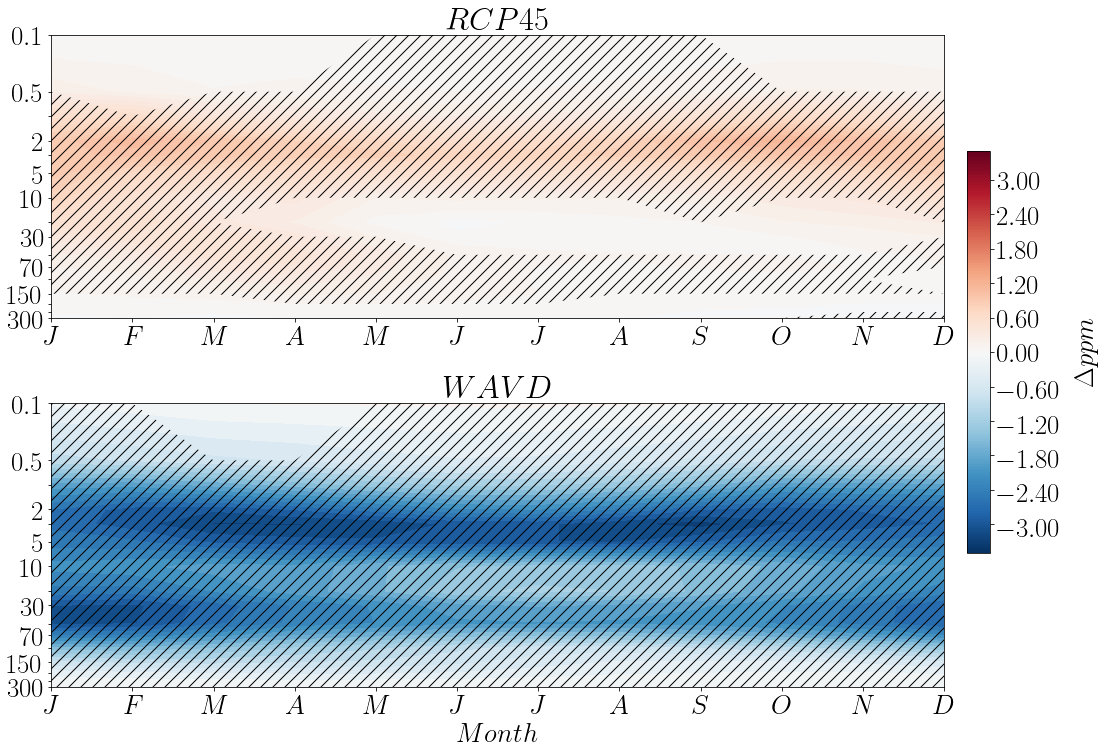

In [44]:
fig = plt.figure(figsize=(16,12))
plt.subplot(2,1,1)
plt.contourf(Months_For_X_Axis,Pressure_L_Strato,RCP45_DDA_Average_ppm,16,cmap='RdBu_r',\
             vmin = -3.5, vmax = 3.5)
plt.contourf(Months_For_X_Axis,Pressure_L_Strato,\
                      RCP45_pval,16,colors = 'none', hatches=['//'],\
             vmin = -3.5, vmax = 3.5)
#plt.ylabel('Pressure (hPa)')
#plt.xlabel('Month')
plt.title('$RCP45$')
plt.yticks(Pressure_L_Strato,Pressure_named_Strato)
plt.xticks(Months_For_X_Axis,Labels_Months)
plt.gca().invert_yaxis();

plt.subplot(2,1,2)
plt.contourf(Months_For_X_Axis,Pressure_L_Strato,wAVD_DDA_Average_ppm,16,cmap='RdBu_r',\
             vmin = -3.5, vmax = 3.5)
plt.contourf(Months_For_X_Axis,Pressure_L_Strato,\
                      wAVD_pval,16,colors = 'none', hatches=['//'],\
             vmin = -3.5, vmax = 3.5)
plt.clim(-3.5,3.5)
#plt.ylabel('Pressure (hPa)')
plt.xlabel('$Month$')
plt.title('$WAVD$')
plt.yticks(Pressure_L_Strato,Pressure_named_Strato)
plt.xticks(Months_For_X_Axis,Labels_Months)
plt.gca().invert_yaxis();

cbar_ax2 = fig.add_axes([0.92, 0.28, 0.02, 0.465])
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=-3.5, vmax=3.5),cmap='RdBu_r')
sm.set_array([])
cbar = fig.colorbar(sm,cbar_ax2,format='$%.2f$')
cbar.set_label('$\Delta ppm$', fontsize=27, labelpad=12)
cbar.ax.tick_params(labelsize=27)
tick_locator = matplotlib.ticker.MaxNLocator(nbins=12)
cbar.locator = tick_locator
cbar.update_ticks()

plt.subplots_adjust(hspace=0.3)
#plt.savefig('Polar Cap Ozone Differences as a Function of Pressure and Month.png',bbox_inches='tight')